In [416]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [417]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [418]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [419]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) <- newnames
names(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [420]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [421]:
airbnb$CodigoPostal[airbnb$CodigoPostal==""] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="-"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="28"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="20013"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="20126"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="25008"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="27004"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="27013"] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="Madrid 28004"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal=="28002\n28002"] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal=="28051\n28051"] <- "28051"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2815"] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2015"] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2805"] <- "28005"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2804"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal=="280013"] <- "28013"
# Eliminar los niveles que se quedan vacíos
airbnb <- droplevels(airbnb) 
airbnb$CodigoPostal

[1] 28004 28004 28004 28004 28015 28004 28004 28004 28015 28004 28004 28004
   [13] 28013 28005 28013 28013 28013 28012 28013 28013 28013 28005 28013 28012
   [25] 28012 28013 28014 28013 28012 28005 28005 28005 28005 28012 28005 28005
   [37] 28045 28005 28005 28005 28005 28005 28013 28013 28013 28013 28013 28012
   [49] 28013 28012 28013 28013 28013 28012 28013 28013 28012 <NA>  <NA>  28045
   [61] 28045 28045 28045 28045 28045 28045 28045 28045 28045 28045 28045 28012
   [73] 28045 28045 28045 28045 28012 28012 28012 28012 28005 28012 <NA>  28005
   [85] 28012 28012 28012 28012 28012 28005 28012 28005 28005 28012 28005 28012
   [97] 28012 28005 28005 28005 28012 28012 28005 28012 28014 28014 28014 28014
  [109] 28012 28014 28014 28014 28012 28014 28014 28014 28014 28014 28012 28012
  [121] 28014 28012 28012 28005 28012 28012 28012 28012 28012 28005 28005 <NA> 
  [133] 28012 <NA>  28012 28012 28012 28005 28012 28012 28014 28014 28045 28045
  [145] 28045 28045 28007 28007 28007 28007 28007 28007 28028 28009 28009 28009
  [157] 28009 28014 28014 28007 28005 28013 28005 28005 28013 28013 28013 28005
  [169] 28013 28013 28005 28005 28005 28013 28013 28013 28005 28013 28005 28013
  [181] 28013 28005 28013 28005 28013 28013 28005 28005 28013 28013 28005 28013
  [193] 28005 28013 28005 28013 28005 28005 28005 28005 28005 28013 28005 28005
  [205] 28005 28013 28013 28012 28005 28012 28005 28012 28005 28012 28012 28005
  [217] 28012 28005 28012 28012 28012 28012 28012 28012 28012 28012 28012 28013
  [229] 28013 28014 28012 28012 28012 28005 28005 28005 28012 28012 28005 28012
  [241] 28012 28012 28012 28012 28012 28012 28014 28014 28014 28014 28012 28014
  [253] 28014 28014 28014 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [265] 28004 28001 28001 28006 28001 28001 28001 28001 28001 28001 28001 28006
  [277] 28009 <NA>  28009 28009 28009 28006 28009 28006 28006 <NA>  28028 <NA> 
  [289] 28028 28028 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [301] 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [313] 28015 28004 28004 28004 28015 28004 28004 28015 28004 28004 28004 28004
  [325] 28004 28013 28015 28004 28015 28004 28004 28004 28015 28004 28004 28004
  [337] 28015 28015 28015 28015 28015 28015 28015 28010 28015 28010 28010 28010
  [349] 28010 28010 28010 28010 28004 28010 28010 28010 28028 28028 28028 28028
  [361] 28006 28006 28006 28006 28002 28002 28006 28002 28002 28034 28050 28008
  [373] 28011 28011 28049 28038 28053 28038 28047 28011 28011 28011 28011 28011
  [385] 28011 28011 28047 28011 28011 28011 28011 <NA>  28025 28019 28019 28024
  [397] 28019 28019 28019 28019 28019 <NA>  28025 28019 28002 28002 28002 28016
  [409] 28016 28036 28016 28016 28016 28036 28016 28046 28039 28039 28020 28020
  [421] 28020 28020 28020 28020 28003 28029 28029 28029 28020 28015 28015 28015
  [433] 28015 28015 28015 28015 28015 28015 28015 28010 28003 28003 28003 28003
  [445] 28003 28003 28029 28008 28008 28008 28008 28008 28015 28008 28008 28008
  [457] 28008 28008 28008 28008 28008 28025 28025 28025 28054 28025 28041 28041
  [469] 28026 28026 28026 28038 28053 28058 28053 28053 28018 28018 28018 28053
  [481] 28053 28030 28030 28030 28017 28017 28027 28027 28027 28027 28027 28027
  [493] 28027 28027 28027 28043 28033 28043 28043 28033 28033 28033 28033 28033
  [505] 28033 28041 28050 28055 28021 28041 28032 28032 28032 28032 28037 28037
  [517] 28022 28027 28042 28004 28004 28004 28004 28004 28004 28004 28015 28004
  [529] 28004 <NA>  28004 28004 28004 28094 28013 28013 28005 28005 28005 28013
  [541] 28005 28005 28013 28005 28005 28005 28005 28005 28013 28013 28005 28013
  [553] 28009 28001 28001 28009 28001 28001 28001 28001 28001 28028 28001 28006
  [565] 28028 28028 28028 28028 28012 28012 28012 28012 28013 28014 28012 28012
  [577] 28013 28005 28013 28013 28013 28012 28013 28013 28045 28045 28045 28045
  [589] 28045 28045 28045 28045 28045 28045 28012 <NA>  28045 28012 28045 28003
  [6

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [422]:
sort(unique(airbnb$CodigoPostal))

[1] 28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012
[13] 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024
[25] 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036
[37] 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048
[49] 28049 28050 28051 28052 28053 28054 28055 28056 28058 28060 28094 28105
[61] 28850
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [423]:
ordenado <- sort(table(airbnb$CodigoPostal))


print("Estos son los 5 códigos Postales con más entradas y el número de entradas de cada uno de ellos")
tail(ordenado, n=5)

print("Estos son los 5 códigos Postales con menos entradas y el número de entradas de cada uno de ellos")
head(ordenado, n=5)

[1] "Estos son los 5 códigos Postales con más entradas y el número de entradas de cada uno de ellos"



28014 28013 28005 28004 28012 
  630  1020  1195  1796  2060 

[1] "Estos son los 5 códigos Postales con menos entradas y el número de entradas de cada uno de ellos"



28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [424]:
print('Los barrios que hay en el código postal 28012 son:')
cp <- airbnb[airbnb$CodigoPostal == "28012",]
cp <- na.omit(cp)
unique(cp$Barrio)

[1] "Los barrios que hay en el código postal 28012 son:"


[1] Sol             Cortes          Embajadores     Palacio        
[5] Palos de Moguer Universidad    
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [425]:
print('Las entradas de los barrios del código postal 28012 son:')
cp <- droplevels(cp)
table(cp$Barrio)

[1] "Las entradas de los barrios del código postal 28012 son:"



         Cortes     Embajadores         Palacio Palos de Moguer             Sol 
             12              55               2               2              27 
    Universidad 
              1 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [426]:
paste('El número de barrios en todo el dataset de airbnb es:', length(unique(airbnb$Barrio)))
print('Los barrios del dataset de airbnb son:')
sort(unique(airbnb$Barrio))

[1] "El número de barrios en todo el dataset de airbnb es: 125"

[1] "Los barrios del dataset de airbnb son:"


[1] Abrantes                     Acacias                     
  [3] Adelfas                      Aeropuerto                  
  [5] Aguilas                      Alameda de Osuna            
  [7] Almagro                      Almenara                    
  [9] Almendrales                  Aluche                      
 [11] Ambroz                       Amposta                     
 [13] Apostol Santiago             Arapiles                    
 [15] Aravaca                      Arcos                       
 [17] Argüelles                    Atocha                      
 [19] Bellas Vistas                Berruguete                  
 [21] Buenavista                   Butarque                    
 [23] Campamento                   Canillas                    
 [25] Canillejas                   Cármenes                    
 [27] Casa de Campo                Casco Histórico de Barajas  
 [29] Casco Histórico de Vallecas  Casco Histórico de Vicálvaro
 [31] Castellana                   Castilla                    
 [33] Castillejos                  Chopera                     
 [35] Ciudad Jardín                Ciudad Universitaria        
 [37] Colina                       Comillas                    
 [39] Concepción                   Corralejos                  
 [41] Cortes                       Costillares                 
 [43] Cuatro Caminos               Cuatro Vientos              
 [45] Delicias                     El Goloso                   
 [47] El Plantío                   El Viso                     
 [49] Embajadores                  Entrevías                   
 [51] Estrella                     Fontarrón                   
 [53] Fuente del Berro             Fuentelareina               
 [55] Gaztambide                   Goya                        
 [57] Guindalera                   Hellín                      
 [59] Hispanoamérica               Ibiza                       
 [61] Imperial                     Jerónimos                   
 [63] Justicia                     La Paz                      
 [65] Legazpi                      Lista                       
 [67] Los Angeles                  Los Rosales                 
 [69] Lucero                       Marroquina                  
 [71] Media Legua                  Mirasierra                  
 [73] Moscardó                     Niño Jesús                  
 [75] Nueva España                 Numancia                    
 [77] Opañel                       Orcasitas                   
 [79] Orcasur                      Pacífico                    
 [81] Palacio                      Palomas                     
 [83] Palomeras Bajas              Palomeras Sureste           
 [85] Palos de Moguer              Pavones                     
 [87] Peñagrande                   Pilar                       
 [89] Pinar del Rey                Piovera                     
 [91] Portazgo                     Pradolongo                  
 [93] Prosperidad                  Pueblo Nuevo                
 [95] Puerta Bonita                Puerta del Angel            
 [97] Quintana                     Recoletos                   
 [99] Rejas                        Rios Rosas                  
[101] Rosas                        Salvador                    
[103] San Andrés                   San Cristobal               
[105] San Diego                    San Fermín                  
[107] San Isidro                   San Juan Bautista           
[109] San Pascual                  Santa Eugenia               
[111] Simancas                     Sol                         
[113] Timón                        Trafalgar                   
[115] Universidad                  Valdeacederas               
[117] Valdefuentes                 Valdemarín                  
[119] Valdezarza                   Vallehermoso                
[121] Valverde                     Ventas                      
[123] Vinateros                    Vista Alegre                
[125] Zofío                       

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [427]:
print("Los 5 barrios con un mayor número de entradas son los siguientes:")
tail(sort(table(airbnb$Barrio)), n=5)

[1] "Los 5 barrios con un mayor número de entradas son los siguientes:"



   Justicia         Sol     Palacio Universidad Embajadores 
        785         940        1083        1358        1844 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [428]:
paste('En el dataset de airbnb hay', length(unique(airbnb$TipoAlquiler)), 'tipos de alquileres diferentes')
print('Los diferentes tipos de alquiler existentes en el dataset de airbnb son:')
sort(unique(airbnb$TipoAlquiler))
print('Las entradas en el dataframe por cada tipo de alquiler son las siguientes:')
table(airbnb$TipoAlquiler)

[1] "En el dataset de airbnb hay 3 tipos de alquileres diferentes"

[1] "Los diferentes tipos de alquiler existentes en el dataset de airbnb son:"


[1] Entire home/apt Private room    Shared room    
Levels: Entire home/apt Private room Shared room

[1] "Las entradas en el dataframe por cada tipo de alquiler son las siguientes:"



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


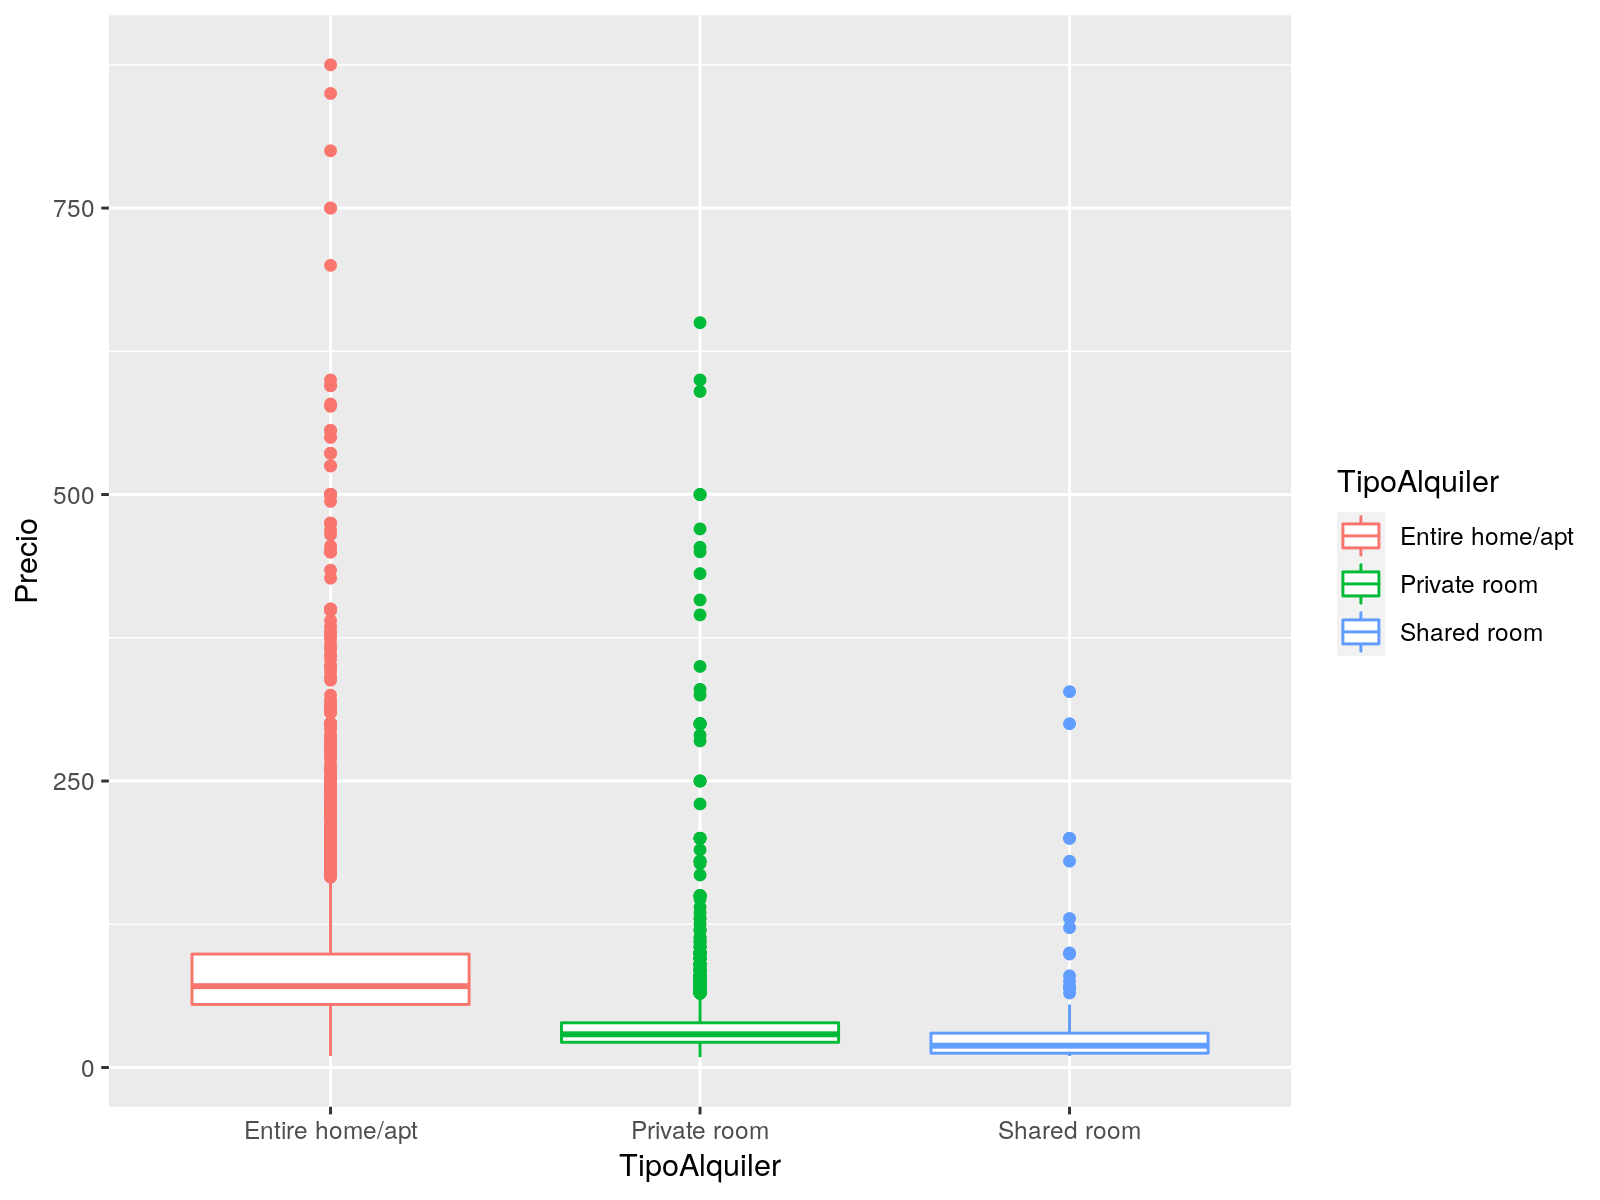

In [429]:
library("ggplot2")
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [430]:
#Aplicar el test de shapiro para cada uno de ellos, el precio medio sería la variable dependiente, si sale un pvalor menor de 0,05 usamos test de kruskal sino usamos test de anova
#Para Entire home/apt
calculoMedia <- airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]
paste('El precio medio de alquiler para Entire home/apt es de:',mean(calculoMedia$Precio, na.rm=T))
calculoMedia <- calculoMedia[1:5000,]
paste('El resultado de P-valor del test de shapiro para Entire home/apt es:',shapiro.test(calculoMedia$Precio)$p.value)

#Para Private room
calculoMedia <- airbnb[airbnb$TipoAlquiler == 'Private room',]
paste('El precio medio de alquiler para Private room es de:',mean(calculoMedia$Precio, na.rm=T))
calculoMedia <- calculoMedia[1:5000,]
paste('El resultado de P-valor del test de shapiro para Private room es:',shapiro.test(calculoMedia$Precio)$p.value)

#Para Shared room
calculoMedia <- airbnb[airbnb$TipoAlquiler == 'Shared room',]
paste('El precio medio de alquiler para Shared room es de:',mean(calculoMedia$Precio, na.rm=T))
calculoMedia <- calculoMedia[1:5000,]
paste('El resultado de P-valor del test de shapiro para Shared room es:',shapiro.test(calculoMedia$Precio)$p.value)

#como el resultado indica que es una distribución normal, se le aplica kruskal
print('El resultado obtenido del test de kruskal es el siguiente y demuestra que la diferencia es estadísticamente significativa porque el resultado de p-valor es mucho menor que 0,05')
kruskal.test(Precio~TipoAlquiler, airbnb)

[1] "El precio medio de alquiler para Entire home/apt es de: 87.2966058763931"

[1] "El resultado de P-valor del test de shapiro para Entire home/apt es: 1.24077898621874e-72"

[1] "El precio medio de alquiler para Private room es de: 34.255135981217"

[1] "El resultado de P-valor del test de shapiro para Private room es: 9.18974842339072e-85"

[1] "El precio medio de alquiler para Shared room es de: 29.8534031413613"

[1] "El resultado de P-valor del test de shapiro para Shared room es: 4.51672121600842e-24"

[1] "El resultado obtenido del test de kruskal es el siguiente y demuestra que la diferencia es estadísticamente significativa porque el resultado de p-valor es mucho menor que 0,05"



	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [431]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [432]:
print('Los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler son:')
tail(sort(table(airbnb_entire$Barrio)), n=5)

[1] "Los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler son:"



     Cortes         Sol     Palacio Universidad Embajadores 
        574         701         769         984        1228 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [433]:
agg <- aggregate(Precio ~ Barrio, data = airbnb_entire, mean)
agg <- agg[order(agg$Precio),]
print('Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros, y su precio medio son los siguientes:')
barrio_precio <- tail(agg, n=5)
barrio_precio

[1] "Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros, y su precio medio son los siguientes:"


,Barrio,Precio
,<fct>,<dbl>
30,Castellana,141.3889
43,El Plantío,150.0000
93,Recoletos,161.9254
50,Fuentelareina,180.0000
77,Palomas,309.7500


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [434]:
barrio_entradas <- aggregate(Precio ~ Barrio, data=airbnb_entire, length)
names(barrio_entradas)[2] <- "Freq"
barrio_apartamentos <- merge(barrio_precio, barrio_entradas, by="Barrio")
print('Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros, su precio medio y la cantidad de apartamentos disponibles por barrio son los siguientes:')
barrio_apartamentos <- barrio_apartamentos[order(barrio_apartamentos$Freq),]
barrio_apartamentos

[1] "Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros, su precio medio y la cantidad de apartamentos disponibles por barrio son los siguientes:"


,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
2,El Plantío,150.0000,1
3,Fuentelareina,180.0000,2
4,Palomas,309.7500,4
1,Castellana,141.3889,72
5,Recoletos,161.9254,134


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [437]:
#Supongo que esta pregunta hace referencia al dataset entero, y no al anterior que el merge ya estaba filtrado por los cinco barrios con un precio medio más alto
#Por lo que vamos a hacer un nuevo merge con todos los barrios
barrio_100_apartamentos <- merge(agg, barrio_entradas, by="Barrio")
barrio_100_apartamentos <- subset(barrio_100_apartamentos,Freq > 100)

barrio_100_apartamentos <- barrio_100_apartamentos[order(barrio_100_apartamentos$Precio),]
print('Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros, su precio medio y la cantidad de apartamentos disponibles por barrio, siempre que sean más de 100 son los siguientes:')
tail(barrio_100_apartamentos,n=5)

[1] "Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros, su precio medio y la cantidad de apartamentos disponibles por barrio, siempre que sean más de 100 son los siguientes:"


,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
59,Justicia,98.25468,534
108,Trafalgar,98.57848,223
106,Sol,100.75036,701
52,Goya,111.33803,142
93,Recoletos,161.92537,134


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


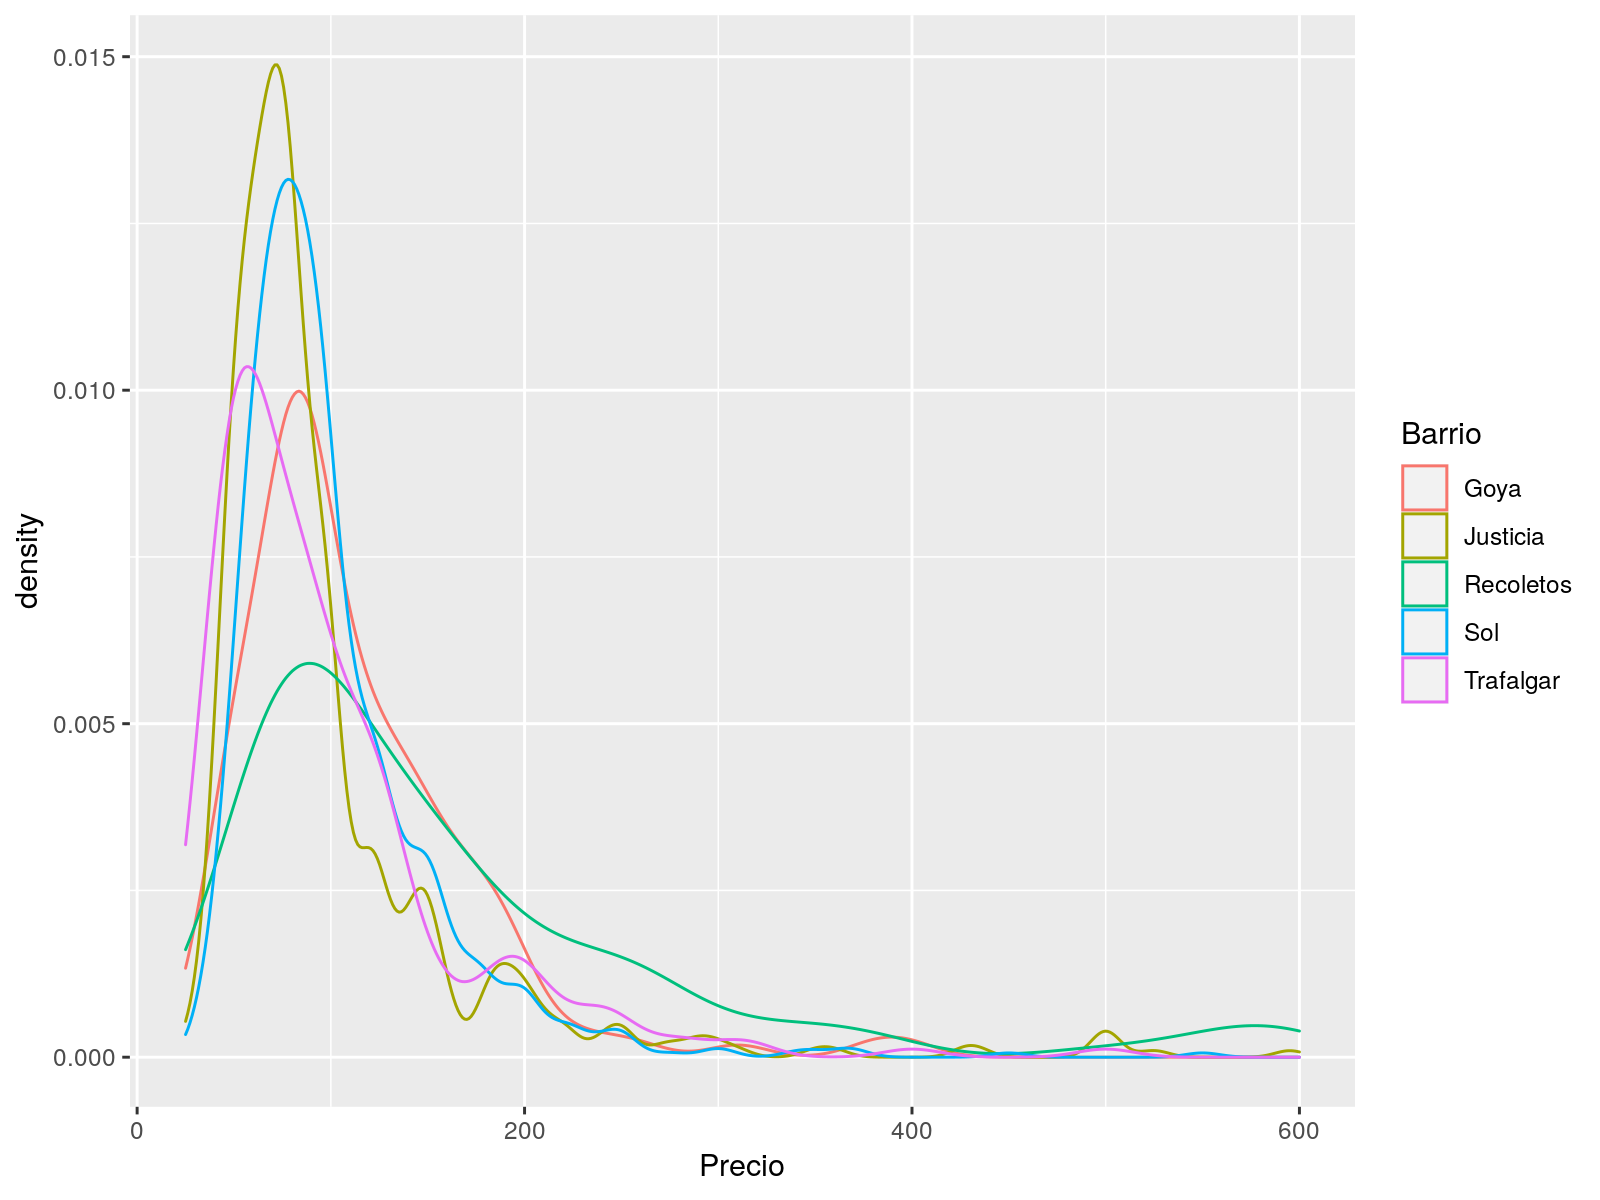

In [438]:
barrios5 <- tail(barrio_100_apartamentos,n=5)$Barrio
barrios_plot <- subset(airbnb_entire, Barrio %in% barrios5)
ggplot(data=barrios_plot,aes(color=Barrio,x=Precio))+geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [439]:
agg_m2 <- aggregate(MetrosCuadrados ~ Barrio, data = airbnb_entire, mean)
agg_m2 <- agg_m2[order(agg_m2$MetrosCuadrados),]
barrio_m2 <- merge(tail(barrio_100_apartamentos,n=5), agg_m2, by="Barrio")
print('La media de los tamaños de los apartamentos de los 5 barrios anteriores son los siguientes:')
barrio_m2

[1] "La media de los tamaños de los apartamentos de los 5 barrios anteriores son los siguientes:"


Barrio,Precio,Freq,MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,134,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


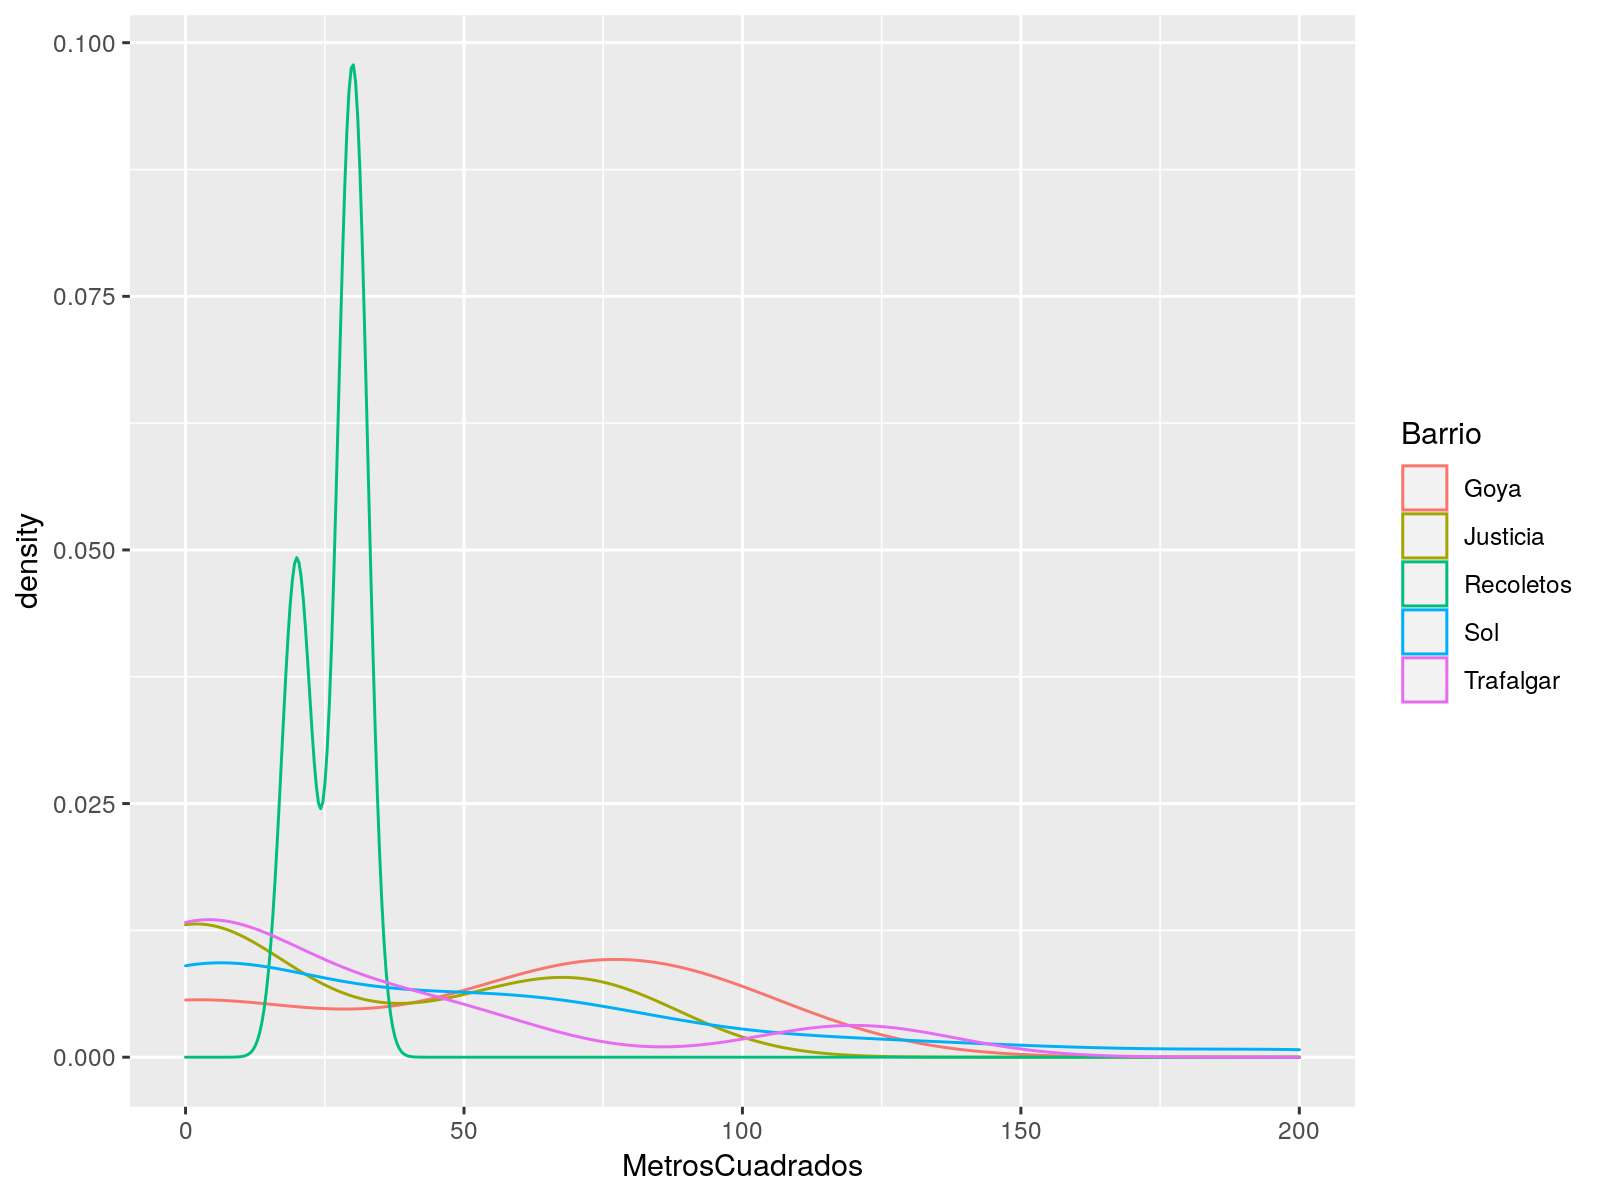

In [440]:
ggplot(data=barrios_plot,aes(color=Barrio,x=MetrosCuadrados))+geom_density()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [441]:
barrios_5 <- barrio_m2$Barrio
for (v in barrios_5){
    barrios_5000 <- barrios_plot[barrios_plot$Barrio == v,]
    barrios_5000 <- barrios_5000[1:5000,]
    print(paste("Barrio:", v, "p-valor:",shapiro.test(barrios_5000$MetrosCuadrados)$p.value))
}
#Como hemos obtenido el p-valor menor que 0,05 para la mayoría de los barrios aplicamos kruskal

print("El resultado del test de Kruskal es el siguiente, en el que NO se puede demostrar que las medias de los metros cuadrados de los barrios sean estadísticamente diferentes, debido a que el p-valor obtenido es mucho mayor que 0,05")
kruskal.test(MetrosCuadrados~Barrio,barrios_plot)

[1] "Barrio: Goya p-valor: 0.519924091564745"
[1] "Barrio: Justicia p-valor: 0.00064192630271212"
[1] "Barrio: Recoletos p-valor: 0"
[1] "Barrio: Sol p-valor: 8.6913775134728e-07"
[1] "Barrio: Trafalgar p-valor: 0.0127581397426826"
[1] "El resultado del test de Kruskal es el siguiente, en el que NO se puede demostrar que las medias de los metros cuadrados de los barrios sean estadísticamente diferentes, debido a que el p-valor obtenido es mucho mayor que 0,05"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [442]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [443]:
print("La correlación de las variables NumBanyos, NumDormitorios, MaxOcupantes y MetrosCuadrados es:")
barrio_sol_cor <- barrio_sol[c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")]
cr <- cor(barrio_sol_cor[1:4], use="pairwise.complete.obs")
cr

[1] "La correlación de las variables NumBanyos, NumDormitorios, MaxOcupantes y MetrosCuadrados es:"


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.

Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


[1] "Se observa que hay 20 apartamentos con valores de metros cuadrados muy bajos"


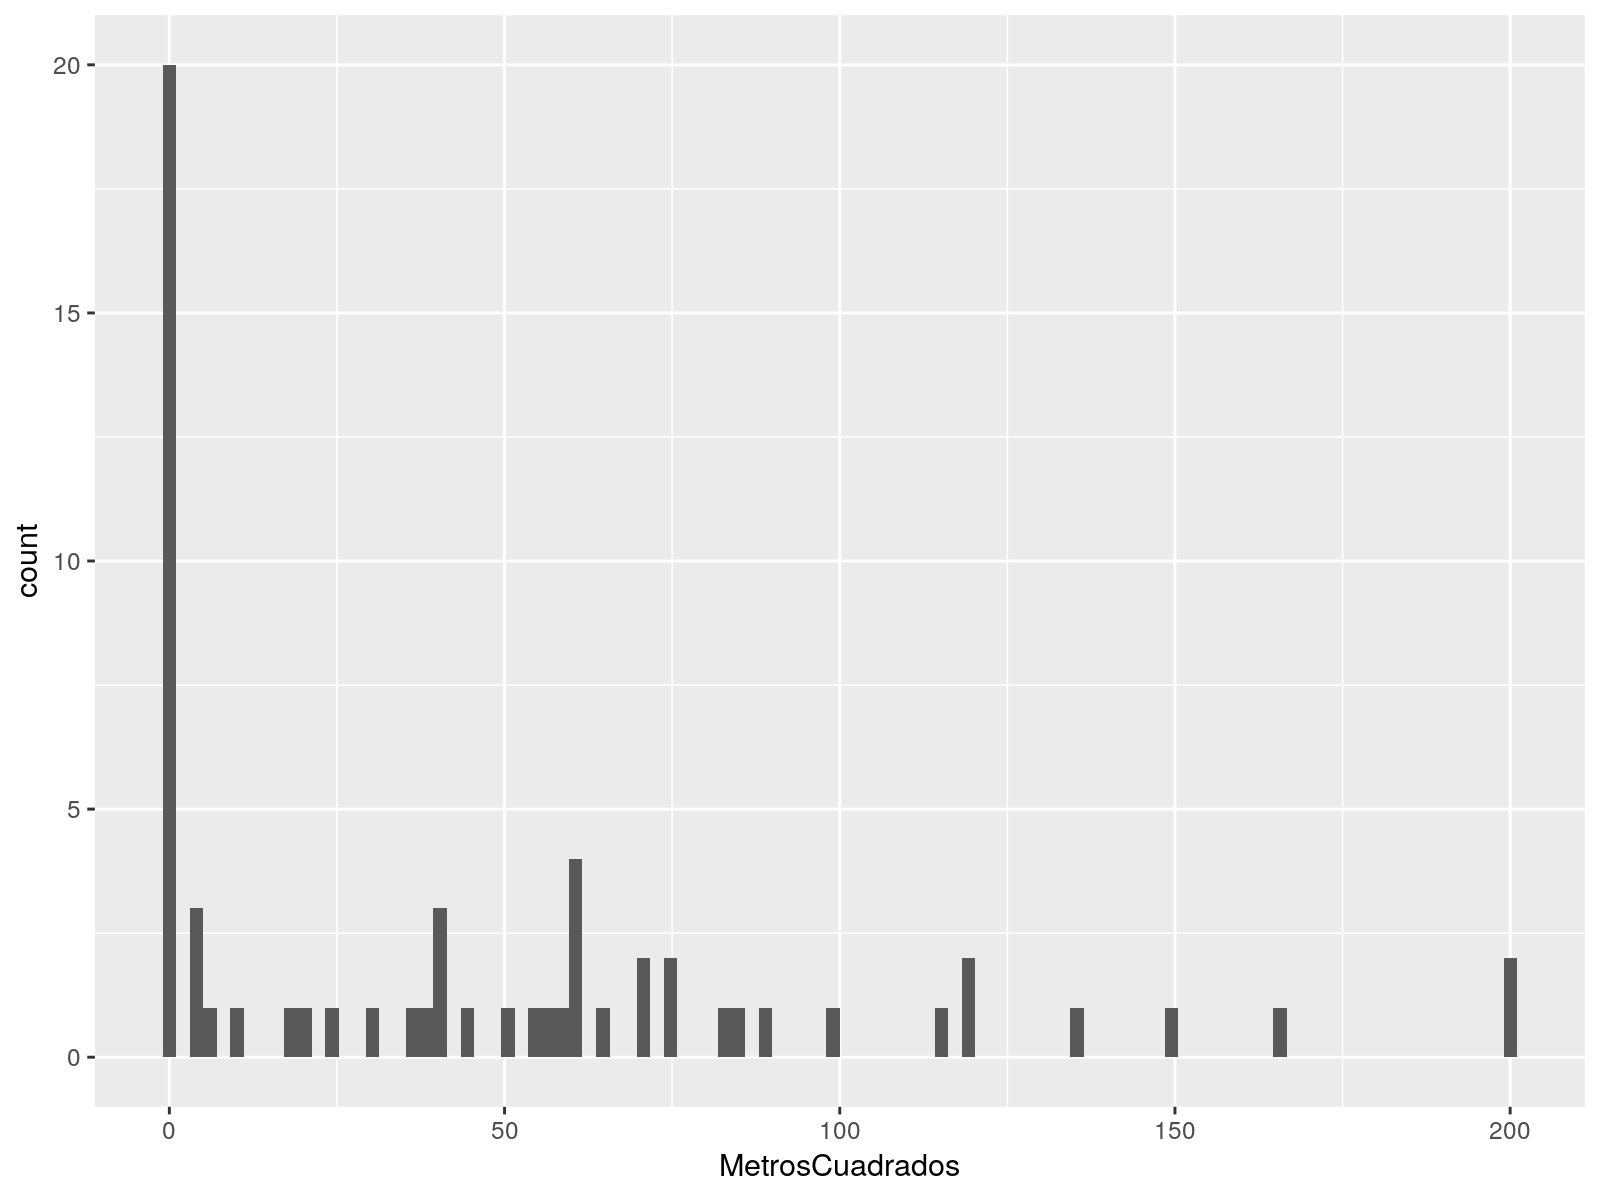

[1] "Se observa que hay apartamentos con valores cero en número de dormitorios"


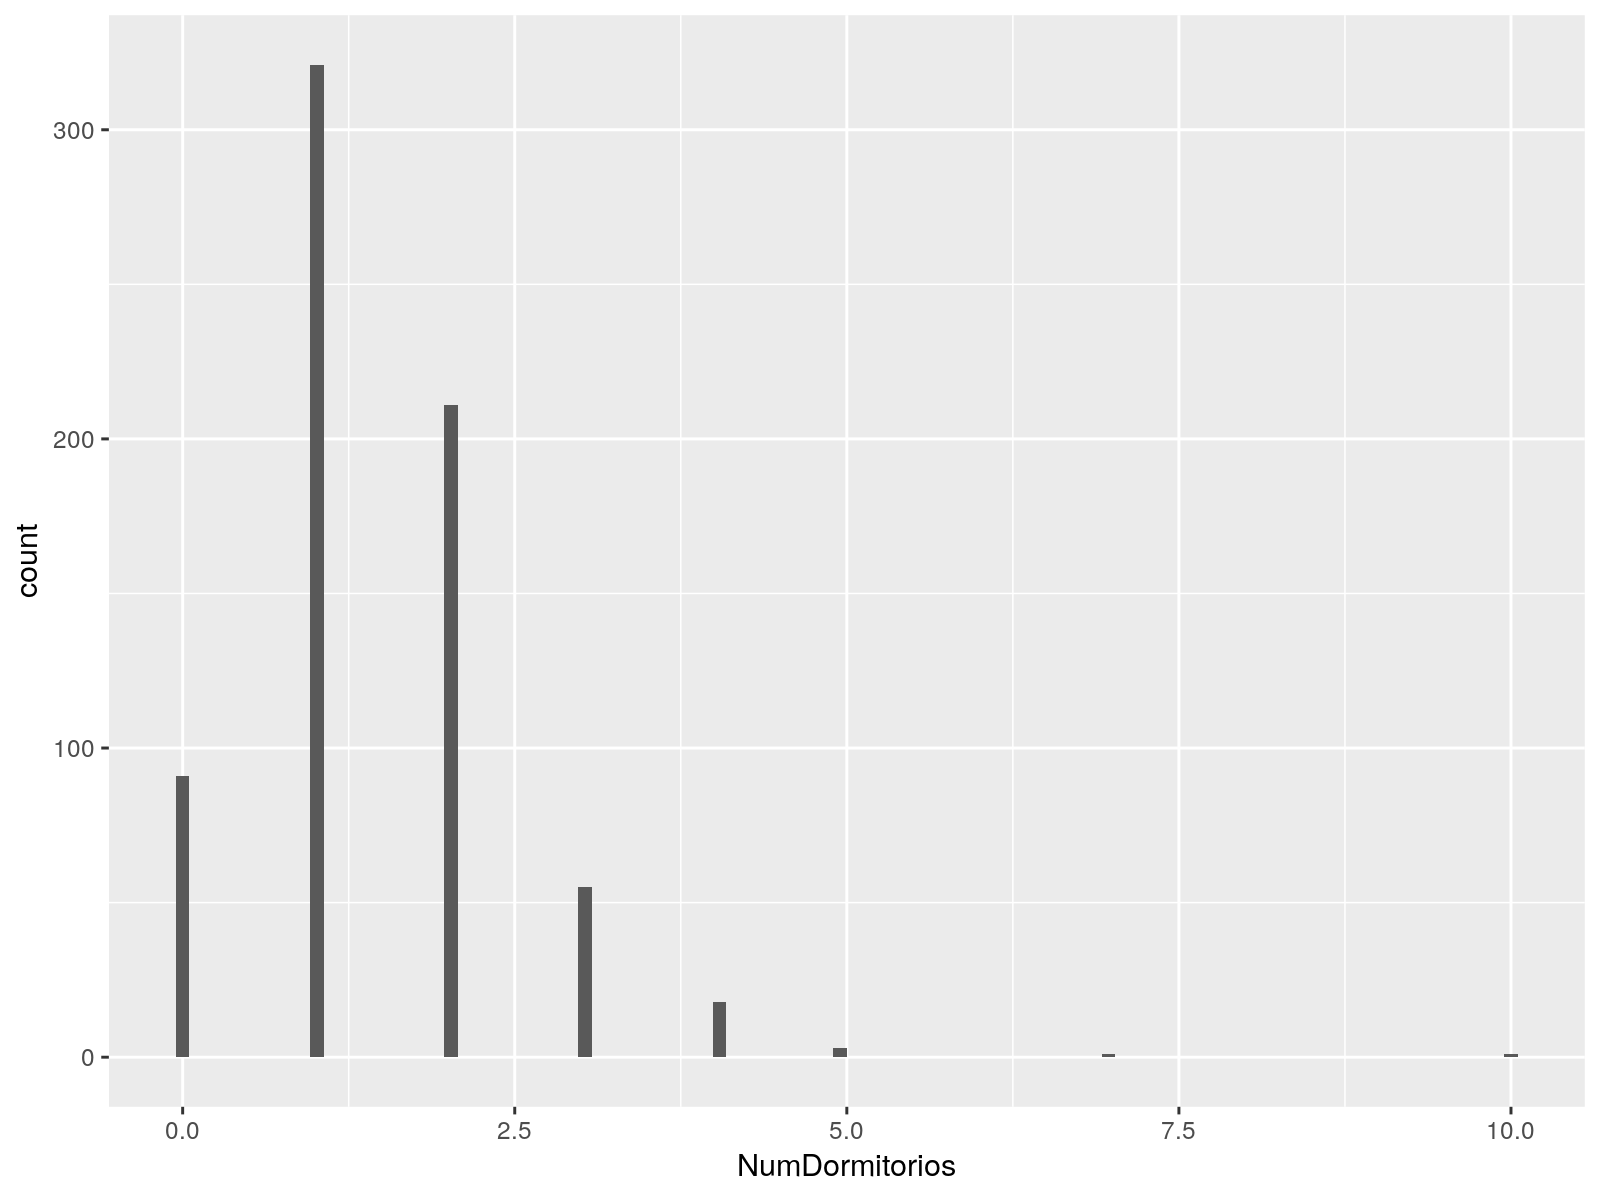

In [444]:
ggplot(data=barrio_sol,aes(x=MetrosCuadrados))+geom_histogram(position="dodge",bins=100)
print("Se observa que hay 20 apartamentos con valores de metros cuadrados muy bajos")

ggplot(data=barrio_sol,aes(x=NumDormitorios))+geom_histogram(position="dodge",bins=100)
print("Se observa que hay apartamentos con valores cero en número de dormitorios")

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [445]:
barrio_sol_filtrado <-subset(barrio_sol,MetrosCuadrados > "10")
barrio_sol_filtrado <-subset(barrio_sol_filtrado,NumDormitorios > "0")

print("La correlación de las variables NumBanyos, NumDormitorios, MaxOcupantes y MetrosCuadrados es:")
barrio_sol_filtrado_cor <- barrio_sol_filtrado[c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")]
cr_f <- cor(barrio_sol_filtrado_cor[1:4], use="pairwise.complete.obs")
cr_f

[1] "La correlación de las variables NumBanyos, NumDormitorios, MaxOcupantes y MetrosCuadrados es:"


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7427272,0.8518237,0.5581533
NumDormitorios,0.7427272,1.0000000,0.7913624,0.7844599
MaxOcupantes,0.8518237,0.7913624,1.0000000,0.7042954
MetrosCuadrados,0.5581533,0.7844599,0.7042954,1.0000000


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [446]:
barrio_sol_filtrado$NumDormitorios <- as.integer(barrio_sol_filtrado$NumDormitorios)
modelo <- lm(data=barrio_sol_filtrado, formula=Precio~NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(modelo)

modelo <- lm(data=barrio_sol_filtrado, formula=Precio~NumDormitorios+MetrosCuadrados)
summary(modelo)

modelo_numdorm <- lm(data=barrio_sol_filtrado, formula=Precio~NumDormitorios)
summary(modelo_numdorm)

modelo_m2 <- lm(data=barrio_sol_filtrado, formula=Precio~MetrosCuadrados)
summary(modelo_m2)

print("Tal y como se puede observar en los resultados, el número de habitaciones es más fiable que los metros cuadrados para conocer el precio de un apartamento, tanto si se utiliza un modelo con todas las variables, como con sólo esas dos o cada una por separado.")


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.620 -15.106  -3.756  16.436  61.155 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      29.6212    11.4500   2.587 0.014597 *  
NumBanyos        -1.7754    14.2879  -0.124 0.901915    
NumDormitorios   34.1998     8.9016   3.842 0.000566 ***
MaxOcupantes      1.8490     4.2396   0.436 0.665773    
MetrosCuadrados   0.1552     0.1703   0.911 0.369085    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.48 on 31 degrees of freedom
Multiple R-squared:  0.7519,	Adjusted R-squared:  0.7199 
F-statistic: 23.49 on 4 and 31 DF,  p-value: 5.23e-09



Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.199 -15.086  -3.247  16.407  61.466 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      31.6675     9.1863   3.447  0.00156 ** 
NumDormitorios   36.0271     6.8871   5.231 9.33e-06 ***
MetrosCuadrados   0.1782     0.1556   1.145  0.26053    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.66 on 33 degrees of freedom
Multiple R-squared:   0.75,	Adjusted R-squared:  0.7348 
F-statistic: 49.49 on 2 and 33 DF,  p-value: 1.167e-10



Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.461 -16.325  -0.613  20.084  55.539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.401      9.102   3.670 0.000825 ***
NumDormitorios   42.212      4.291   9.838 1.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.8 on 34 degrees of freedom
Multiple R-squared:   0.74,	Adjusted R-squared:  0.7324 
F-statistic: 96.79 on 1 and 34 DF,  p-value: 1.769e-11



Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.346 -24.109  -8.425  21.620 127.361 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      50.0885    11.3052   4.431 9.28e-05 ***
MetrosCuadrados   0.8168     0.1286   6.351 3.02e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.52 on 34 degrees of freedom
Multiple R-squared:  0.5426,	Adjusted R-squared:  0.5292 
F-statistic: 40.34 on 1 and 34 DF,  p-value: 3.024e-07


[1] "Tal y como se puede observar en los resultados, el número de habitaciones es más fiable que los metros cuadrados para conocer el precio de un apartamento, tanto si se utiliza un modelo con todas las variables, como con sólo esas dos o cada una por separado."


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [449]:
#Se aplica la función confint a un modelo que utiliza sólo la variable de metros cuadrados para saber el rango de euros que incrementa cada metro cuadrado extra
cnf_int_m2 <- confint(modelo_m2)
cnf_int_m2

,2.5 %,97.5 %
(Intercept),27.1135264,73.063466
MetrosCuadrados,0.5554401,1.078151


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [450]:
#Se aplica la función confint a un modelo que utiliza sólo la variable de número de dormitorios para saber cual es el rango de incremento de euros por habitación
cnf_int_numdorm <- confint(modelo_numdorm)
cnf_int_numdorm

,2.5 %,97.5 %
(Intercept),14.90364,51.89820
NumDormitorios,33.49228,50.93168


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [451]:
#Para calcular la probabiliad de encontrar un apartamento en alquiler con 3 dormitorios en el barrio de Sol, necesitamos dividir el número de apartamentos en alquiler con 3 dormitorios entre el número total de apartamentos del barrio de Sol
barrio_sol_total_apartamentos <- nrow(barrio_sol_filtrado)

barrio_sol_3dormitorios<-subset(barrio_sol_filtrado,NumDormitorios=="3")
barrio_sol_3dormitorios_cantidad <-nrow(barrio_sol_3dormitorios)

paste("La probabilidad de encontrar un apartamento de 3 dormitorios en el barrio de Sol es de:",barrio_sol_3dormitorios_cantidad / barrio_sol_total_apartamentos)

paste("El intervalo de confianza de esa probabilidad es:")
round(binom.test(barrio_sol_3dormitorios_cantidad,barrio_sol_total_apartamentos)$conf.int,4)

[1] "La probabilidad de encontrar un apartamento de 3 dormitorios en el barrio de Sol es de: 0.0833333333333333"

[1] "El intervalo de confianza de esa probabilidad es:"

[1] 0.0175 0.2247
attr(,"conf.level")
[1] 0.95